In [1]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
import json
import time

In [2]:
# plt.style.use('seaborn')
# plt.style.use('fivethirtyeight')
plt.style.use('seaborn-whitegrid')
# plt.rcParams['figure.figsize'] = (8,5)

In [3]:
def rounding_vector(vector, decimal=0):
    aux = []
    for item in vector:
        aux.append(round(item,decimal))
    
    return aux

In [4]:
def read_as_json(file_name):
    with open(file_name) as json_file:
        data = json.load(json_file)
    return data

In [5]:
'''The order on vectors is corresponding with evaluated groups e.g.:[G1,G2,G3,G4,G5]'''
baseline_ild = [0.9694159990485626,0.9442230039447174,0.9593941978720311,0.9354006319845902,0.97624502398981]
baseline_p10 = [0.8,0.4,0.4,0.5,0.5]

In [6]:
'''The vector for the proposal are disposed in order: [
                                                        [[G1_stan,G1_greedy,G1_random],...,[G1_stan,G1_greedy,G1_random]],
                                                        ...
                                                        [[G5_stan,G5_greedy,G5_random],...,[G5_stan,G5_greedy,G5_random]]
                                                      ]
The number of time we ran the experiment of each group was 5.'''

prop_ild = [
    [
        [0.7953019541614298, 0.9787078861191725, 0.9415961502132234],
        [0.83595627722388, 0.9794474805350205, 0.9269096165856556],
        [0.8046898441895997, 0.9786704305770814, 0.9498343426588619],
        [0.7022654150181958, 0.9680878734647854, 0.9620026451215553],
        [0.7826719901093202, 0.9647759255163505, 0.913428396728993]
    ],
    [
        [0.8867713232142258, 0.9715281467775868, 0.9628325417950339],
        [0.8867713232142258, 0.9625387435728876, 0.9544003846259438],
        [0.9032843555872834, 0.9703775775686588, 0.9703063462249915],
        [0.8867713232142257, 0.9625387435728876, 0.9518114636326479],
        [0.9032843555872834, 0.9715281467775868, 0.9337829857250093]
    ],
    [
        [0.8920139156044071, 0.966798794846502, 0.9697985676457304],
        [0.8702020419685647, 0.970747543794492, 0.8768227023395017],
        [0.8702020419685647, 0.9619970131026159, 0.9471800896121105],
        [0.8818772896713497, 0.971108625977288, 0.9550575778521848],
        [0.8337506089491183, 0.9756616313236539, 0.9340112560558589]
    ],
    [
        [0.8505838166646339, 0.9522913415950041, 0.951958549063721],
        [0.8138669593643366, 0.9705507902994455, 0.9604825088532633],
        [0.8577610904066053, 0.9509413556439898, 0.9373745661158465],
        [0.7624477228928005, 0.9318603997344501, 0.953664423885352],
        [0.8856317578764273, 0.9683581044592141, 0.9363364809443784]
    ],
    [
        [0.9148043937915583, 0.94185076469001, 0.9562622538784413],
        [0.9178876062072044, 0.942209485189788, 0.9203903595071468],
        [0.9123873254810145, 0.9430853210971428, 0.9317932765696845],
        [0.914837868893038, 0.9533031351106007, 0.9289118635298854],
        [0.8867019303506269, 0.9450310271629726, 0.9240419189104845]
    ]
]

prop_p10 = [
    [
        [0.4, 0.4, 0.4],
        [0.6, 0.6, 0.2],
        [0.4, 0.5, 0.1],
        [0.4, 0.5, 0.2],
        [0.5, 0.6, 0.3]
    ],
    [
        [0.4, 0.6, 0.3],
        [0.4, 0.6, 0.3],
        [0.4, 0.5, 0.4],
        [0.4, 0.6, 0.3],
        [0.4, 0.7, 0.4]
    ],
    [
        [0.4, 0.5, 0.3],
        [0.3, 0.5, 0.4],
        [0.3, 0.5, 0.5],
        [0.3, 0.5, 0.5],
        [0.3, 0.5, 0.1]
    ],
    [
        [0.4, 0.4, 0.1],
        [0.4, 0.5, 0.3],
        [0.5, 0.5, 0.3],
        [0.3, 0.4, 0.3],
        [0.5, 0.5, 0.3]
    ],
    [
        [0.4, 0.4, 0.3],
        [0.4, 0.4, 0.5],
        [0.5, 0.5, 0.3],
        [0.4, 0.4, 0.5],
        [0.5, 0.6, 0.6]
    ]
]

In [7]:
def get_means_std_dict(data):
    output_dict = []
    for group in data:
        standard = []
        greedy = []
        random = []
        for run in group:
            standard.append(run[0])
            greedy.append(run[1])
            random.append(run[2])

        my_dict = dict()
        my_dict['m_standard'] = round(statistics.mean(standard),4)
        my_dict['m_greedy'] = round(statistics.mean(greedy),4)
        my_dict['m_random'] = round(statistics.mean(random),4)
        my_dict['std_standard'] = round(statistics.stdev(standard),4)
        my_dict['std_greedy'] = round(statistics.stdev(greedy),4)
        my_dict['std_random'] = round(statistics.stdev(random),4)

        output_dict.append(my_dict)
        
    return output_dict

In [8]:
prop_p10_plot = get_means_std_dict(prop_p10)

print(prop_p10_plot)

[{'m_standard': 0.46, 'm_greedy': 0.52, 'm_random': 0.24, 'std_standard': 0.0894, 'std_greedy': 0.0837, 'std_random': 0.114}, {'m_standard': 0.4, 'm_greedy': 0.6, 'm_random': 0.34, 'std_standard': 0.0, 'std_greedy': 0.0707, 'std_random': 0.0548}, {'m_standard': 0.32, 'm_greedy': 0.5, 'm_random': 0.36, 'std_standard': 0.0447, 'std_greedy': 0.0, 'std_random': 0.1673}, {'m_standard': 0.42, 'm_greedy': 0.46, 'm_random': 0.26, 'std_standard': 0.0837, 'std_greedy': 0.0548, 'std_random': 0.0894}, {'m_standard': 0.44, 'm_greedy': 0.46, 'm_random': 0.44, 'std_standard': 0.0548, 'std_greedy': 0.0894, 'std_random': 0.1342}]


In [9]:
# prop_p10_plot = []
# for group in prop_p10:
#     standard = []
#     greedy = []
#     random = []
#     for run in group:
#         standard.append(run[0])
#         greedy.append(run[1])
#         random.append(run[2])
        
#     my_dict = dict()
#     my_dict['m_standard'] = round(statistics.mean(standard),4)
#     my_dict['m_greedy'] = round(statistics.mean(greedy),4)
#     my_dict['m_random'] = round(statistics.mean(random),4)
#     my_dict['std_standard'] = round(statistics.stdev(standard),4)
#     my_dict['std_greedy'] = round(statistics.stdev(greedy),4)
#     my_dict['std_random'] = round(statistics.stdev(random),4)
    
#     prop_p10_plot.append(my_dict)
        
# print(prop_p10_plot)

In [10]:
with open('prop_p10.json', 'w') as json_file:  
    json.dump(prop_p10_plot, json_file)

In [11]:
print(prop_ild)

[[[0.7953019541614298, 0.9787078861191725, 0.9415961502132234], [0.83595627722388, 0.9794474805350205, 0.9269096165856556], [0.8046898441895997, 0.9786704305770814, 0.9498343426588619], [0.7022654150181958, 0.9680878734647854, 0.9620026451215553], [0.7826719901093202, 0.9647759255163505, 0.913428396728993]], [[0.8867713232142258, 0.9715281467775868, 0.9628325417950339], [0.8867713232142258, 0.9625387435728876, 0.9544003846259438], [0.9032843555872834, 0.9703775775686588, 0.9703063462249915], [0.8867713232142257, 0.9625387435728876, 0.9518114636326479], [0.9032843555872834, 0.9715281467775868, 0.9337829857250093]], [[0.8920139156044071, 0.966798794846502, 0.9697985676457304], [0.8702020419685647, 0.970747543794492, 0.8768227023395017], [0.8702020419685647, 0.9619970131026159, 0.9471800896121105], [0.8818772896713497, 0.971108625977288, 0.9550575778521848], [0.8337506089491183, 0.9756616313236539, 0.9340112560558589]], [[0.8505838166646339, 0.9522913415950041, 0.951958549063721], [0.8138

In [12]:
rounded = []
for group in prop_ild:
    block = []
    for run in group:
        block.append(rounding_vector(run,4))
    rounded.append(block)
    
print(rounded)

[[[0.7953, 0.9787, 0.9416], [0.836, 0.9794, 0.9269], [0.8047, 0.9787, 0.9498], [0.7023, 0.9681, 0.962], [0.7827, 0.9648, 0.9134]], [[0.8868, 0.9715, 0.9628], [0.8868, 0.9625, 0.9544], [0.9033, 0.9704, 0.9703], [0.8868, 0.9625, 0.9518], [0.9033, 0.9715, 0.9338]], [[0.892, 0.9668, 0.9698], [0.8702, 0.9707, 0.8768], [0.8702, 0.962, 0.9472], [0.8819, 0.9711, 0.9551], [0.8338, 0.9757, 0.934]], [[0.8506, 0.9523, 0.952], [0.8139, 0.9706, 0.9605], [0.8578, 0.9509, 0.9374], [0.7624, 0.9319, 0.9537], [0.8856, 0.9684, 0.9363]], [[0.9148, 0.9419, 0.9563], [0.9179, 0.9422, 0.9204], [0.9124, 0.9431, 0.9318], [0.9148, 0.9533, 0.9289], [0.8867, 0.945, 0.924]]]


In [13]:
prop_ild_plot = get_means_std_dict(rounded)

print(prop_ild_plot)

[{'m_standard': 0.7842, 'm_greedy': 0.9739, 'm_random': 0.9387, 'std_standard': 0.0498, 'std_greedy': 0.0069, 'std_random': 0.0191}, {'m_standard': 0.8934, 'm_greedy': 0.9677, 'm_random': 0.9546, 'std_standard': 0.009, 'std_greedy': 0.0047, 'std_random': 0.0137}, {'m_standard': 0.8696, 'm_greedy': 0.9693, 'm_random': 0.9366, 'std_standard': 0.022, 'std_greedy': 0.0051, 'std_random': 0.0358}, {'m_standard': 0.8341, 'm_greedy': 0.9548, 'm_random': 0.948, 'std_standard': 0.0475, 'std_greedy': 0.0157, 'std_random': 0.0107}, {'m_standard': 0.9093, 'm_greedy': 0.9451, 'm_random': 0.9323, 'std_standard': 0.0128, 'std_greedy': 0.0047, 'std_random': 0.0141}]


In [14]:
# prop_ild_plot = []
# for group in rounded:
#     standard = []
#     greedy = []
#     random = []
#     for run in group:
#         standard.append(run[0])
#         greedy.append(run[1])
#         random.append(run[2])
        
#     my_dict = dict()
#     my_dict['m_standard'] = round(statistics.mean(standard),4)
#     my_dict['m_greedy'] = round(statistics.mean(greedy),4)
#     my_dict['m_random'] = round(statistics.mean(random),4)
#     my_dict['std_standard'] = round(statistics.stdev(standard),4)
#     my_dict['std_greedy'] = round(statistics.stdev(greedy),4)
#     my_dict['std_random'] = round(statistics.stdev(random),4)
    
#     prop_ild_plot.append(my_dict)
        
# print(prop_ild_plot)

In [15]:
with open('prop_ild.json', 'w') as json_file:  
    json.dump(prop_ild_plot, json_file)

In [16]:
baseline_ild = rounding_vector(baseline_ild,4)
print(baseline_ild)

[0.9694, 0.9442, 0.9594, 0.9354, 0.9762]


Text(0.5, 1.0, 'Baseline performance on ILD metric')

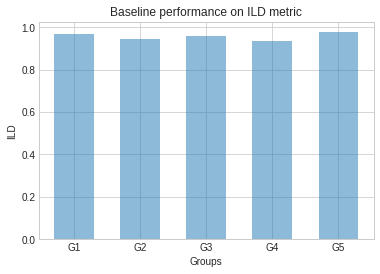

In [17]:
objects = ('G1', 'G2', 'G3', 'G4', 'G5')
y_pos = np.arange(len(objects))
values_ild = baseline_ild

plt.bar(y_pos, values_ild, width=0.6, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('ILD')
plt.xlabel('Groups')
plt.title('Baseline performance on ILD metric')

In [18]:
prop_ild = read_as_json('prop_ild.json')
prop_ild

[{'m_standard': 0.7842,
  'm_greedy': 0.9739,
  'm_random': 0.9387,
  'std_standard': 0.0498,
  'std_greedy': 0.0069,
  'std_random': 0.0191},
 {'m_standard': 0.8934,
  'm_greedy': 0.9677,
  'm_random': 0.9546,
  'std_standard': 0.009,
  'std_greedy': 0.0047,
  'std_random': 0.0137},
 {'m_standard': 0.8696,
  'm_greedy': 0.9693,
  'm_random': 0.9366,
  'std_standard': 0.022,
  'std_greedy': 0.0051,
  'std_random': 0.0358},
 {'m_standard': 0.8341,
  'm_greedy': 0.9548,
  'm_random': 0.948,
  'std_standard': 0.0475,
  'std_greedy': 0.0157,
  'std_random': 0.0107},
 {'m_standard': 0.9093,
  'm_greedy': 0.9451,
  'm_random': 0.9323,
  'std_standard': 0.0128,
  'std_greedy': 0.0047,
  'std_random': 0.0141}]

In [19]:
m_standard = []
m_greedy = []
m_random = []
std_standard = []
std_greedy = []
std_random = []
for group in prop_ild:
    m_standard.append(group['m_standard'])
    m_greedy.append(group['m_greedy'])
    m_random.append(group['m_random'])
    std_standard.append(group['std_standard'])
    std_greedy.append(group['std_greedy'])
    std_random.append(group['std_random'])
    
print(m_standard, m_greedy, m_random)

baseline_ild = [0.9694159990485626,0.9442230039447174,0.9593941978720311,0.9354006319845902,0.97624502398981]

[0.7842, 0.8934, 0.8696, 0.8341, 0.9093] [0.9739, 0.9677, 0.9693, 0.9548, 0.9451] [0.9387, 0.9546, 0.9366, 0.948, 0.9323]


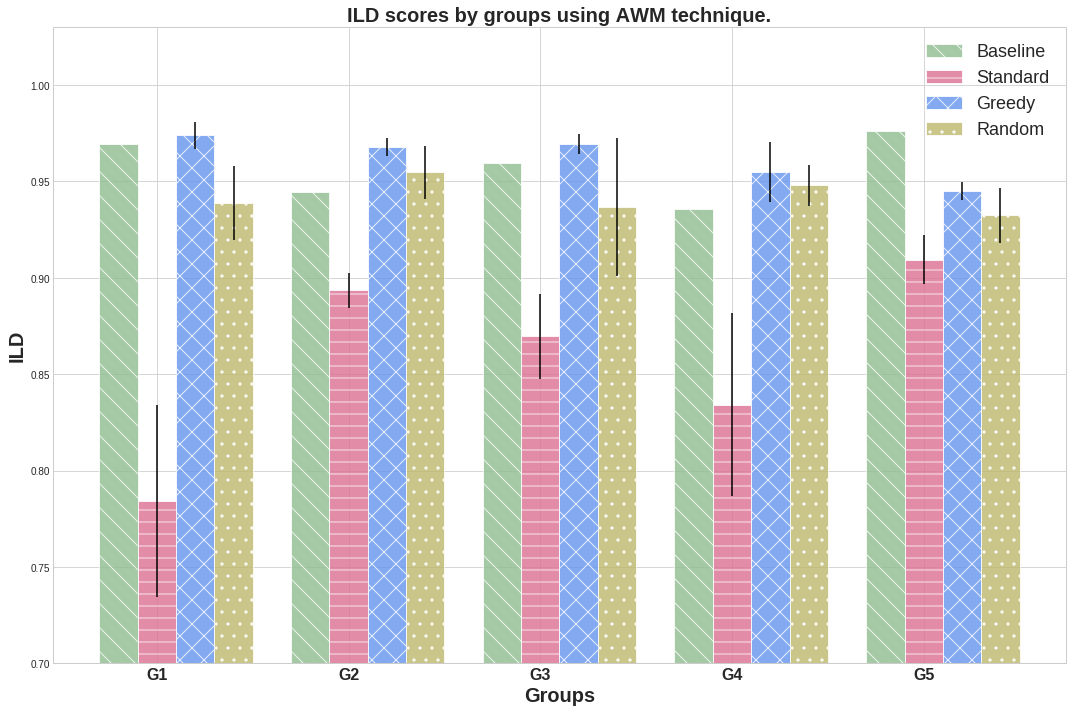

In [21]:
plt.rcParams['figure.figsize'] = (15,10)

# data to plot
n = 5
baseline_ild
m_standard
m_greedy
m_random
std_standard
std_greedy
std_random

# create plot
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.2
opacity = 0.8

line1 = plt.bar(index, baseline_ild, bar_width, alpha=opacity, color='darkseagreen', label='Baseline', hatch="\\", edgecolor='white')
line2 = plt.bar(index + bar_width, m_standard, bar_width, alpha=opacity, color='palevioletred', yerr=std_standard,  label='Standard', hatch="-", edgecolor='white')
line3 = plt.bar(index + bar_width + bar_width, m_greedy, bar_width, alpha=opacity, color='cornflowerblue', yerr=std_greedy, label='Greedy', hatch="x", edgecolor='white')
line4 = plt.bar(index + bar_width + bar_width + bar_width, m_random, bar_width, alpha=opacity, color='darkkhaki', yerr=std_random, label='Random', hatch=".", edgecolor='white')


plt.xlabel('Groups', fontweight="bold", fontsize=20)
plt.ylabel('ILD', fontweight="bold", fontsize=20)
plt.title('ILD scores by groups using AWM technique.', fontweight="bold", fontsize=20)
plt.xticks(index + bar_width, ('G1', 'G2', 'G3', 'G4', 'G5'), fontweight="bold", fontsize="16")

plt.legend(fontsize=18)

axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_ylim([0.7,None])

plt.savefig('ild_scores_by_groups_enhanced_AWM.png', transparent=True)
plt.tight_layout()
plt.show()

In [22]:
m_standard_p10 = []
m_greedy_p10 = []
m_random_p10 = []
std_standard_p10 = []
std_greedy_p10 = []
std_random_p10 = []
for group in prop_p10_plot:
    m_standard_p10.append(group['m_standard'])
    m_greedy_p10.append(group['m_greedy'])
    m_random_p10.append(group['m_random'])
    std_standard_p10.append(group['std_standard'])
    std_greedy_p10.append(group['std_greedy'])
    std_random_p10.append(group['std_random'])
    
print(m_standard_p10, m_greedy_p10, m_random_p10)

baseline_p10 = [0.8,0.4,0.4,0.5,0.5]

[0.46, 0.4, 0.32, 0.42, 0.44] [0.52, 0.6, 0.5, 0.46, 0.46] [0.24, 0.34, 0.36, 0.26, 0.44]


[0.46, 0.4, 0.32, 0.42, 0.44] [0.52, 0.6, 0.5, 0.46, 0.46] [0.24, 0.34, 0.36, 0.26, 0.44]


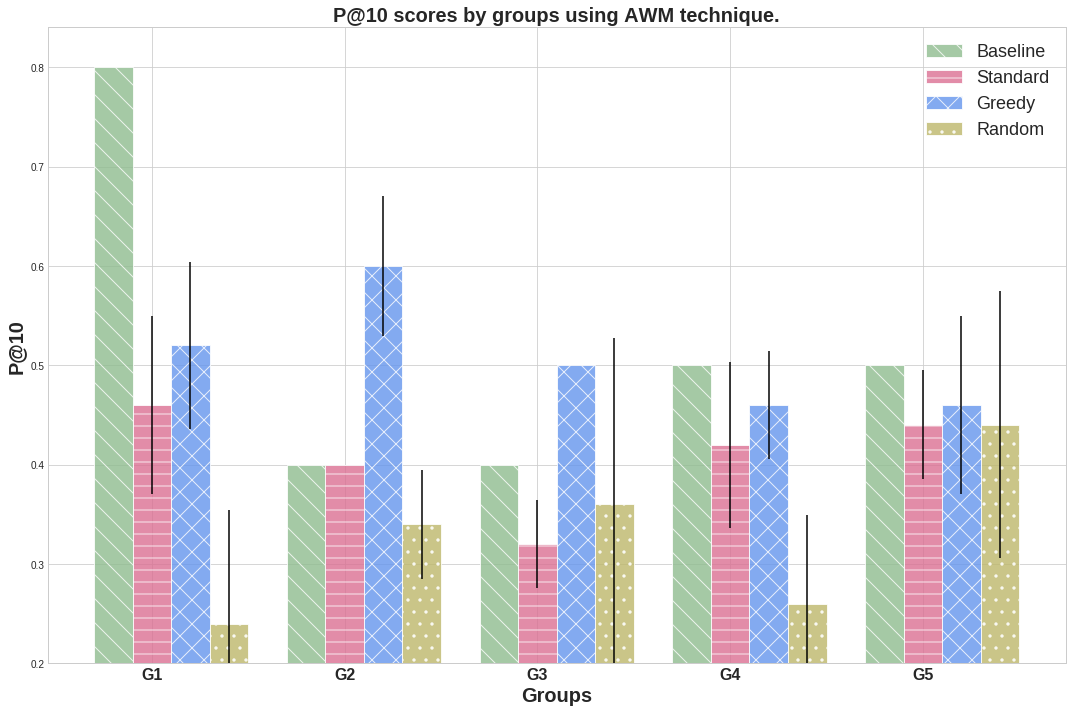

In [23]:
plt.rcParams['figure.figsize'] = (15,10)

# data to plot
n = 5
baseline_p10
m_standard = m_standard_p10
m_greedy = m_greedy_p10
m_random = m_random_p10
std_standard = std_standard_p10
std_greedy = std_greedy_p10
std_random = std_random_p10

print(m_standard, m_greedy, m_random)

# create plot
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.2
opacity = 0.8

line1 = plt.bar(index, baseline_p10, bar_width, alpha=opacity, color='darkseagreen', label='Baseline', hatch="\\", edgecolor='white')
line2 = plt.bar(index + bar_width, m_standard, bar_width, alpha=opacity, color='palevioletred', yerr=std_standard,  label='Standard', hatch="-", edgecolor='white')
line3 = plt.bar(index + bar_width + bar_width, m_greedy, bar_width, alpha=opacity, color='cornflowerblue', yerr=std_greedy, label='Greedy', hatch="x", edgecolor='white')
line4 = plt.bar(index + bar_width + bar_width + bar_width, m_random, bar_width, alpha=opacity, color='darkkhaki', yerr=std_random, label='Random', hatch=".", edgecolor='white')


plt.xlabel('Groups', fontweight="bold", fontsize=20)
plt.ylabel('P@10', fontweight="bold", fontsize=20)
plt.title('P@10 scores by groups using AWM technique.', fontweight="bold", fontsize=20)
plt.xticks(index + bar_width, ('G1', 'G2', 'G3', 'G4', 'G5'), fontweight="bold", fontsize="16")

plt.legend(fontsize=18)

axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_ylim([0.2,None])

plt.savefig('p@10_scores_by_groups_AWM.png', transparent=True)
plt.tight_layout()
plt.show()

In [24]:
prop_p10 = [
    [
        [0.4, 0.4, 0.4],
        [0.6, 0.6, 0.2],
        [0.4, 0.5, 0.1],
        [0.4, 0.5, 0.2],
        [0.5, 0.6, 0.3]
    ],
    [
        [0.4, 0.6, 0.3],
        [0.4, 0.6, 0.3],
        [0.4, 0.5, 0.4],
        [0.4, 0.6, 0.3],
        [0.4, 0.7, 0.4]
    ],
    [
        [0.4, 0.5, 0.3],
        [0.3, 0.5, 0.4],
        [0.3, 0.5, 0.5],
        [0.3, 0.5, 0.5],
        [0.3, 0.5, 0.1]
    ],
    [
        [0.4, 0.4, 0.1],
        [0.4, 0.5, 0.3],
        [0.5, 0.5, 0.3],
        [0.3, 0.4, 0.3],
        [0.5, 0.5, 0.3]
    ],
    [
        [0.4, 0.4, 0.3],
        [0.4, 0.4, 0.5],
        [0.5, 0.5, 0.3],
        [0.4, 0.4, 0.5],
        [0.5, 0.6, 0.6]
    ]
]

prop_p5 = [
    [
        [0.4, 0.4, 0.2],
        [0.6, 0.4, 0.6],
        [0.6, 0.4, 0.2],
        [0.6, 0.4, 0.4],
        [0.6, 0.6, 0.0]
    ],
    [
        [0.6, 0.6, 0.4],
        [0.6, 0.6, 0.2],
        [0.4, 0.4, 0.4],
        [0.6, 0.6, 0.5],
        [0.6, 0.6, 0.4]
    ],
    [
        [0.4, 0.4, 0.2],
        [0.6, 0.6, 0.5],
        [0.4, 0.6, 0.4],
        [0.4, 0.6, 0.4],
        [0.4, 0.4, 0.2]
    ],
    [
        [0.4, 0.6, 0.0],
        [0.6, 0.8, 0.4],
        [0.6, 0.4, 0.4],
        [0.2, 0.4, 0.2],
        [0.4, 0.4, 0.2]
    ],
    [
        [0.2, 0.4, 0.3],
        [0.2, 0.4, 0.3],
        [0.2, 0.4, 0.4],
        [0.2, 0.6, 0.4],
        [0.2, 0.6, 0.2]
    ]
]

prop_p3 = [
    [
        [0.3333, 0.3333, 0.3333],
        [0.6666, 0.6666, 0.3333],
        [0.6666, 0.3333, 0.3333],
        [0.6666, 0.3333, 0.0],
        [0.6666, 0.3333, 0.0]
    ],
    [
        [0.6666, 0.6666, 0.3333],
        [0.6666, 0.6666, 0.0],
        [0.6666, 0.3333, 0.3333],
        [0.6666, 0.6666, 0.3333],
        [0.6666, 0.6666, 0.3333]
    ],
    [
        [0.3333, 0.3333, 0.3333],
        [0.6666, 0.6666, 0.3333],
        [0.6666, 0.6666, 0.3333],
        [0.6666, 0.6666, 0.0],
        [0.6666, 0.3333, 0.3333]
    ],
    [
        [0.6666, 0.3333, 0.0],
        [0.6666, 0.6666, 0.3333],
        [0.6666, 0.6666, 0.3333],
        [0.0, 0.3333, 0.0],
        [0.3333, 0.6666, 0.3333]
    ],
    [
        [0.0, 0.3333, 0.0],
        [0.0, 0.0, 0.0],
        [0.3333, 0.3333, 0.0],
        [0.0, 0.6666, 0.0],
        [0.0, 0.3333, 0.3333]
    ]
]

# baseline_p10 = [0.8,0.4,0.4,0.5,0.5]
baseline_p10 = [0.8,0.4,0.4,0.5]

# baseline_p5 = [1.0, 0.6, 0.4, 0.2, 0.8]
baseline_p5 = [1.0, 0.6, 0.4, 0.2]

# baseline_p3 = [1.0, 0.6666, 0.6666, 0.0, 0.6666]
baseline_p3 = [1.0, 0.6666, 0.6666, 0.0]

In [25]:
p5 = get_means_std_dict(prop_p5)

print(p5)

[{'m_standard': 0.56, 'm_greedy': 0.44, 'm_random': 0.28, 'std_standard': 0.0894, 'std_greedy': 0.0894, 'std_random': 0.228}, {'m_standard': 0.56, 'm_greedy': 0.56, 'm_random': 0.38, 'std_standard': 0.0894, 'std_greedy': 0.0894, 'std_random': 0.1095}, {'m_standard': 0.44, 'm_greedy': 0.52, 'm_random': 0.34, 'std_standard': 0.0894, 'std_greedy': 0.1095, 'std_random': 0.1342}, {'m_standard': 0.44, 'm_greedy': 0.52, 'm_random': 0.24, 'std_standard': 0.1673, 'std_greedy': 0.1789, 'std_random': 0.1673}, {'m_standard': 0.2, 'm_greedy': 0.48, 'm_random': 0.32, 'std_standard': 0.0, 'std_greedy': 0.1095, 'std_random': 0.0837}]


In [26]:
p3 = get_means_std_dict(prop_p3)

print(p3)

[{'m_standard': 0.5999, 'm_greedy': 0.4, 'm_random': 0.2, 'std_standard': 0.1491, 'std_greedy': 0.1491, 'std_random': 0.1826}, {'m_standard': 0.6666, 'm_greedy': 0.5999, 'm_random': 0.2666, 'std_standard': 0.0, 'std_greedy': 0.1491, 'std_random': 0.1491}, {'m_standard': 0.5999, 'm_greedy': 0.5333, 'm_random': 0.2666, 'std_standard': 0.1491, 'std_greedy': 0.1826, 'std_random': 0.1491}, {'m_standard': 0.4666, 'm_greedy': 0.5333, 'm_random': 0.2, 'std_standard': 0.2981, 'std_greedy': 0.1826, 'std_random': 0.1826}, {'m_standard': 0.0667, 'm_greedy': 0.3333, 'm_random': 0.0667, 'std_standard': 0.1491, 'std_greedy': 0.2357, 'std_random': 0.1491}]


In [27]:
p10 = get_means_std_dict(prop_p10)

print(p10)

[{'m_standard': 0.46, 'm_greedy': 0.52, 'm_random': 0.24, 'std_standard': 0.0894, 'std_greedy': 0.0837, 'std_random': 0.114}, {'m_standard': 0.4, 'm_greedy': 0.6, 'm_random': 0.34, 'std_standard': 0.0, 'std_greedy': 0.0707, 'std_random': 0.0548}, {'m_standard': 0.32, 'm_greedy': 0.5, 'm_random': 0.36, 'std_standard': 0.0447, 'std_greedy': 0.0, 'std_random': 0.1673}, {'m_standard': 0.42, 'm_greedy': 0.46, 'm_random': 0.26, 'std_standard': 0.0837, 'std_greedy': 0.0548, 'std_random': 0.0894}, {'m_standard': 0.44, 'm_greedy': 0.46, 'm_random': 0.44, 'std_standard': 0.0548, 'std_greedy': 0.0894, 'std_random': 0.1342}]


In [28]:
def get_means_precision_standard_greedy_random(this_dict, n=5):
    m_standard = []
    m_greedy = []
    m_random = []
    aux_s = 0
    aux_g = 0
    aux_r = 0
    for i in range(0,n):
        aux_s += this_dict[i]['m_standard']
        aux_g += this_dict[i]['m_greedy']
        aux_r += this_dict[i]['m_random']

#     print('acc: stan:{}, gree:{}, rand:{}'.format(aux_s, aux_g, aux_r))
    m_standard = aux_s/(i+1)
    m_greedy = aux_g/(i+1)
    m_random = aux_r/(i+1)
#     print('medias: stan:{}, gree:{}, rand:{}'.format(m_p5_standard, m_p5_greedy, m_p5_random))
    return m_standard,m_greedy,m_random

In [29]:
m_p5_s, m_p5_g, m_p5_r = get_means_precision_standard_greedy_random(p5, n=4)
print(m_p5_s, m_p5_g, m_p5_r)

0.5 0.51 0.31


In [30]:
m_p3_s, m_p3_g, m_p3_r = get_means_precision_standard_greedy_random(p3,n=4)
print(m_p3_s, m_p3_g, m_p3_r)

0.58325 0.516625 0.2333


In [31]:
m_p10_s, m_p10_g, m_p10_r = get_means_precision_standard_greedy_random(p10, n=4)
print(m_p10_s, m_p10_g, m_p10_r)

0.4 0.52 0.30000000000000004


In [32]:
m_bl_p3 = statistics.mean(baseline_p3)
m_bl_p5 = statistics.mean(baseline_p5)
m_bl_p10 = statistics.mean(baseline_p10)
print(m_bl_p3, m_bl_p5, m_bl_p10)

0.5832999999999999 0.55 0.525


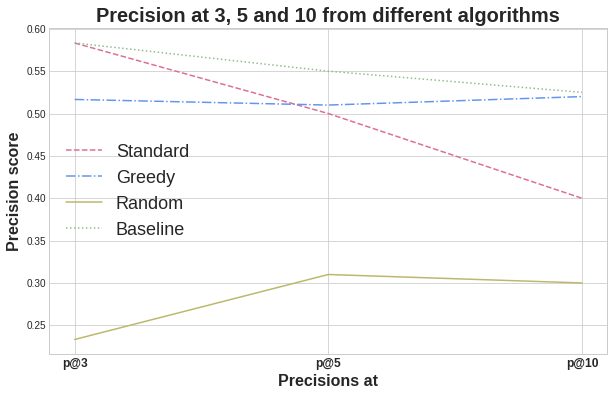

In [33]:
plt.rcParams['figure.figsize'] = (10,6)

precisions = ['p@3','p@5','p@10']
precisions_standard = [m_p3_s, m_p5_s, m_p10_s]
precisions_greedy = [m_p3_g, m_p5_g, m_p10_g]
precisions_random = [m_p3_r, m_p5_r, m_p10_r]
precisions_baseline = [m_bl_p3, m_bl_p5, m_bl_p10]

p_standard, = plt.plot(precisions, precisions_standard, color='palevioletred', linestyle='--')
p_greedy, = plt.plot(precisions, precisions_greedy, color='cornflowerblue', linestyle='-.')
p_random, = plt.plot(precisions, precisions_random, color='darkkhaki', linestyle='-')
p_baseline, = plt.plot(precisions, precisions_baseline, color='darkseagreen', linestyle=':')

plt.xlabel('Precisions at',fontweight="bold", fontsize=16)
plt.ylabel('Precision score',fontweight="bold", fontsize=16)
plt.title('Precision at 3, 5 and 10 from different algorithms',fontweight="bold", fontsize=20)
plt.xticks(precisions, ('p@3','p@5','p@10'), fontweight="bold", fontsize="12")
plt.legend([p_standard, p_greedy, p_random, p_baseline],['Standard','Greedy','Random','Baseline'], fontsize=18)

plt.savefig('p@3_5_10_algorithms_mean.png', transparent=True)
plt.show()


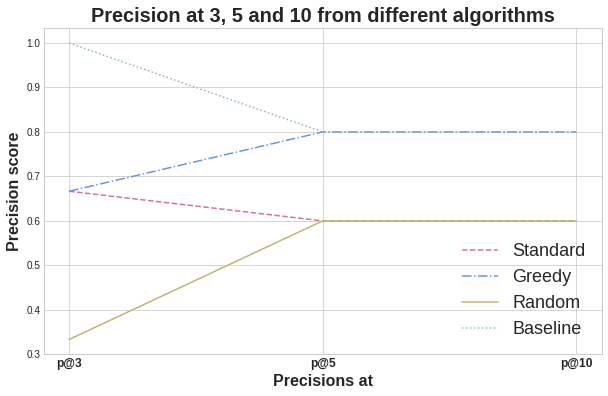

In [34]:
plt.rcParams['figure.figsize'] = (10,6)

precisions = ['p@3','p@5','p@10']
precisions_standard = [0.6666, 0.6, 0.6]
precisions_greedy = [0.6666, 0.8, 0.8]
precisions_random = [0.3333, 0.6, 0.6]
precisions_baseline = [1, 0.8, 0.8]

p_standard, = plt.plot(precisions, precisions_standard, color='palevioletred', linestyle='--')
p_greedy, = plt.plot(precisions, precisions_greedy, color='cornflowerblue', linestyle='-.')
p_random, = plt.plot(precisions, precisions_random, color='darkkhaki', linestyle='-')
p_baseline, = plt.plot(precisions, precisions_baseline, color='darkseagreen', linestyle=':')

plt.xlabel('Precisions at',fontweight="bold", fontsize=16)
plt.ylabel('Precision score',fontweight="bold", fontsize=16)
plt.title('Precision at 3, 5 and 10 from different algorithms',fontweight="bold", fontsize=20)
plt.xticks(precisions, ('p@3','p@5','p@10'), fontweight="bold", fontsize="12")
plt.legend([p_standard, p_greedy, p_random, p_baseline],['Standard','Greedy','Random','Baseline'], fontsize=18)

plt.savefig('p@3_5_10_algorithms_top.png', transparent=True)
plt.show()

In [35]:
'''---------> Graphs generated from json <-----------'''

'''-----> json file has 5 runs and each run has this format:

    {
        "recs_standard": {dict},
        "recs_greedy": {dict},
        "recs_random": {dict},
        "ild_standard": float,
        "ild_greedy": float,
        "ild_random": float,
        "p_3_5_10_standard": list,
        "p_3_5_10_greedy": list,
        "p_3_5_10_random": list
    }

'''


def calculating_ild_from_json(json_obj):
    ''' Calculating mean of ILD '''
    acc_s = []
    acc_g = []
    acc_r = []
    for run in json_obj:
        acc_s.append(run['ild_standard'])
        acc_g.append(run['ild_greedy'])
        acc_r.append(run['ild_random'])
    
    return acc_s, acc_g, acc_r
    


def calculating_p_3_5_10_from_json(json_obj):
    p_3_5_10_s = []
    p_3_5_10_g = []
    p_3_5_10_r = []

    for i in range(0,3):
        acc_s = []
        acc_g = []
        acc_r = []

        for run in json_obj:
            acc_s.append(run['p_3_5_10_standard'][i])
            acc_g.append(run['p_3_5_10_greedy'][i])
            acc_r.append(run['p_3_5_10_random'][i])

        p_3_5_10_s.append(acc_s)
        p_3_5_10_g.append(acc_g)
        p_3_5_10_r.append(acc_r)
    
    return p_3_5_10_s, p_3_5_10_g, p_3_5_10_r 

In [36]:
mp_g1_run = []

with open('MP_G1_run.json', "r") as json_file:
    for line in json_file:
        data = json.loads(line)
        mp_g1_run.append(data)
        

array_mp_s_g1, array_mp_g_g1, array_mp_r_g1 = calculating_ild_from_json(mp_g1_run)
print('array_s={}, array_g={}, array_r={}'.format(array_mp_s_g1, array_mp_g_g1, array_mp_r_g1))


p_3_5_10_mp_s_g1, p_3_5_10_mp_g_g1, p_3_5_10_mp_r_g1 = calculating_p_3_5_10_from_json(mp_g1_run)
print('p_3_5_10_s={}, p_3_5_10_g={}, p_3_5_10_r={}'.format(p_3_5_10_mp_s_g1, p_3_5_10_mp_g_g1, p_3_5_10_mp_r_g1))

array_s=[0.8576537939455824, 0.8576537939455824, 0.8576537939455824, 0.8576537939455824, 0.8576537939455824], array_g=[0.9463255142978348, 0.9463255142978348, 0.9463255142978348, 0.9463255142978348, 0.9463255142978348], array_r=[0.9573923568293371, 0.931699437326727, 0.9378788413331464, 0.950337889644877, 0.9352952755882545]
p_3_5_10_s=[[0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666], [0.6, 0.6, 0.6, 0.6, 0.6], [0.6, 0.6, 0.6, 0.6, 0.6]], p_3_5_10_g=[[1.0, 1.0, 1.0, 1.0, 1.0], [0.8, 0.8, 0.8, 0.8, 0.8], [0.6, 0.6, 0.6, 0.6, 0.6]], p_3_5_10_r=[[0.3333333333333333, 0.6666666666666666, 0.0, 0.0, 0.6666666666666666], [0.4, 0.4, 0.0, 0.2, 0.6], [0.3, 0.4, 0.3, 0.2, 0.4]]


In [37]:
mp_g2_run = []

with open('MP_G2_run.json', "r") as json_file:
    for line in json_file:
        data = json.loads(line)
        mp_g2_run.append(data)
        

array_mp_s_g2, array_mp_g_g2, array_mp_r_g2 = calculating_ild_from_json(mp_g2_run)
print('array_s={}, array_g={}, array_r={}'.format(array_mp_s_g2, array_mp_g_g2, array_mp_r_g2))


p_3_5_10_mp_s_g2, p_3_5_10_mp_g_g2, p_3_5_10_mp_r_g2 = calculating_p_3_5_10_from_json(mp_g2_run)
print('p_3_5_10_s={}, p_3_5_10_g={}, p_3_5_10_r={}'.format(p_3_5_10_mp_s_g2, p_3_5_10_mp_g_g2, p_3_5_10_mp_r_g2))

array_s=[0.8199527486527357, 0.8199527486527357, 0.8199527486527357, 0.8199527486527357, 0.8199527486527357], array_g=[0.9560501757097898, 0.9560501757097898, 0.9560501757097898, 0.9560501757097898, 0.9560501757097898], array_r=[0.9354025336677225, 0.926197324650301, 0.9473621300429571, 0.9578182029006944, 0.9534366205541681]
p_3_5_10_s=[[0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666], [0.4, 0.4, 0.4, 0.4, 0.4], [0.4, 0.4, 0.4, 0.4, 0.4]], p_3_5_10_g=[[1.0, 1.0, 1.0, 1.0, 1.0], [0.8, 0.8, 0.8, 0.8, 0.8], [0.4, 0.4, 0.4, 0.4, 0.4]], p_3_5_10_r=[[0.0, 0.6666666666666666, 1.0, 0.3333333333333333, 0.0], [0.0, 0.8, 0.8, 0.6, 0.2], [0.1, 0.5, 0.7, 0.3, 0.6]]


In [38]:
mp_g3_run = []

with open('MP_G3_run.json', "r") as json_file:
    for line in json_file:
        data = json.loads(line)
        mp_g3_run.append(data)
        

array_mp_s_g3, array_mp_g_g3, array_mp_r_g3 = calculating_ild_from_json(mp_g3_run)
print('array_s={}, array_g={}, array_r={}'.format(array_mp_s_g3, array_mp_g_g3, array_mp_r_g3))


p_3_5_10_mp_s_g3, p_3_5_10_mp_g_g3, p_3_5_10_mp_r_g3 = calculating_p_3_5_10_from_json(mp_g3_run)
print('p_3_5_10_s={}, p_3_5_10_g={}, p_3_5_10_r={}'.format(p_3_5_10_mp_s_g3, p_3_5_10_mp_g_g3, p_3_5_10_mp_r_g3))

array_s=[0.7922859806520856, 0.7922859806520856, 0.7922859806520856, 0.7922859806520856, 0.7922859806520856], array_g=[0.9683537431434039, 0.9683537431434039, 0.9683537431434039, 0.9683537431434039, 0.9683537431434039], array_r=[0.9373282071753094, 0.9517732082406308, 0.9644239090335945, 0.9409774996997139, 0.9600177691809335]
p_3_5_10_s=[[0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666], [0.8, 0.8, 0.8, 0.8, 0.8], [0.7, 0.7, 0.7, 0.7, 0.7]], p_3_5_10_g=[[1.0, 1.0, 1.0, 1.0, 1.0], [0.6, 0.6, 0.6, 0.6, 0.6], [0.5, 0.5, 0.5, 0.5, 0.5]], p_3_5_10_r=[[0.6666666666666666, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 0.6666666666666666], [0.4, 0.4, 0.8, 0.4, 0.8], [0.5, 0.5, 0.5, 0.4, 0.5]]


In [39]:
mp_g4_run = []

with open('MP_G4_run.json', "r") as json_file:
    for line in json_file:
        data = json.loads(line)
        mp_g4_run.append(data)
        

array_mp_s_g4, array_mp_g_g4, array_mp_r_g4 = calculating_ild_from_json(mp_g4_run)
print('array_s={}, array_g={}, array_r={}'.format(array_mp_s_g4, array_mp_g_g4, array_mp_r_g4))


p_3_5_10_mp_s_g4, p_3_5_10_mp_g_g4, p_3_5_10_mp_r_g4 = calculating_p_3_5_10_from_json(mp_g4_run)
print('p_3_5_10_s={}, p_3_5_10_g={}, p_3_5_10_r={}'.format(p_3_5_10_mp_s_g4, p_3_5_10_mp_g_g4, p_3_5_10_mp_r_g4))

array_s=[0.7528608654364657, 0.7528608654364657, 0.8661258754541739, 0.7528608654364657, 0.7528608654364657], array_g=[0.9315171206800258, 0.9315171206800258, 0.9225663153187843, 0.9315171206800258, 0.9315171206800258], array_r=[0.9250685702391277, 0.9114410839464016, 0.9258014843758924, 0.9493867414953611, 0.9464796704891257]
p_3_5_10_s=[[0.0, 0.0, 0.3333333333333333, 0.0, 0.0], [0.0, 0.0, 0.2, 0.0, 0.0], [0.1, 0.1, 0.2, 0.1, 0.1]], p_3_5_10_g=[[0.0, 0.0, 0.3333333333333333, 0.0, 0.0], [0.0, 0.0, 0.2, 0.0, 0.0], [0.1, 0.1, 0.1, 0.1, 0.1]], p_3_5_10_r=[[0.0, 0.3333333333333333, 0.0, 0.6666666666666666, 0.3333333333333333], [0.2, 0.4, 0.0, 0.4, 0.2], [0.2, 0.4, 0.2, 0.4, 0.3]]


In [40]:
mp_g5_run = []

with open('MP_G5_run.json', "r") as json_file:
    for line in json_file:
        data = json.loads(line)
        mp_g5_run.append(data)
        

array_mp_s_g5, array_mp_g_g5, array_mp_r_g5 = calculating_ild_from_json(mp_g5_run)
print('array_s={}, array_g={}, array_r={}'.format(array_mp_s_g5, array_mp_g_g5, array_mp_r_g5))


p_3_5_10_mp_s_g5, p_3_5_10_mp_g_g5, p_3_5_10_mp_r_g5 = calculating_p_3_5_10_from_json(mp_g5_run)
print('p_3_5_10_s={}, p_3_5_10_g={}, p_3_5_10_r={}'.format(p_3_5_10_mp_s_g5, p_3_5_10_mp_g_g5, p_3_5_10_mp_r_g5))

array_s=[0.7935179124826943, 0.7935179124826943, 0.7935179124826943, 0.7935179124826943, 0.7935179124826943], array_g=[0.9546999705365233, 0.9546999705365233, 0.9546999705365233, 0.9546999705365233, 0.9546999705365233], array_r=[0.963034709719179, 0.934511847969542, 0.9465318315816297, 0.9502681792418222, 0.9480044474877171]
p_3_5_10_s=[[0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666], [0.6, 0.6, 0.6, 0.6, 0.6], [0.4, 0.4, 0.4, 0.4, 0.4]], p_3_5_10_g=[[0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333], [0.2, 0.2, 0.2, 0.2, 0.2], [0.4, 0.4, 0.4, 0.4, 0.4]], p_3_5_10_r=[[0.3333333333333333, 0.0, 0.0, 0.3333333333333333, 0.0], [0.6, 0.2, 0.0, 0.2, 0.2], [0.4, 0.2, 0.2, 0.2, 0.2]]


In [41]:
mp_data = [
    [
        [array_mp_s_g1, array_mp_g_g1, array_mp_r_g1],
        [p_3_5_10_mp_s_g1, p_3_5_10_mp_g_g1, p_3_5_10_mp_r_g1]
    ],
    [
        [array_mp_s_g2, array_mp_g_g2, array_mp_r_g2],
        [p_3_5_10_mp_s_g2, p_3_5_10_mp_g_g2, p_3_5_10_mp_r_g2]
    ],
    [
        [array_mp_s_g3, array_mp_g_g3, array_mp_r_g3],
        [p_3_5_10_mp_s_g3, p_3_5_10_mp_g_g3, p_3_5_10_mp_r_g3]
    ],
    [
        [array_mp_s_g4, array_mp_g_g4, array_mp_r_g4],
        [p_3_5_10_mp_s_g4, p_3_5_10_mp_g_g4, p_3_5_10_mp_r_g4]
    ],
    [
        [array_mp_s_g5, array_mp_g_g5, array_mp_r_g5],
        [p_3_5_10_mp_s_g5, p_3_5_10_mp_g_g5, p_3_5_10_mp_r_g5]
    ]
]

In [42]:
prop_ild_mp = []
for group in mp_data:
    group_info = []
    for run in range(0,5):
        run_info = []
        run_info.append(group[0][0][run])
        run_info.append(group[0][1][run])
        run_info.append(group[0][2][run])
        group_info.append(run_info)
    prop_ild_mp.append(group_info)


# for item in prop_ild_mp:
#     for inner_item in item:
#         print(inner_item)

In [43]:
lm_g1_run = []

with open('LM_G1_run.json', "r") as json_file:
    for line in json_file:
        data = json.loads(line)
        lm_g1_run.append(data)
        

array_lm_s_g1, array_lm_g_g1, array_lm_r_g1 = calculating_ild_from_json(lm_g1_run)
print('array_s={}, array_g={}, array_r={}'.format(array_lm_s_g1, array_lm_g_g1, array_lm_r_g1))


p_3_5_10_lm_s_g1, p_3_5_10_lm_g_g1, p_3_5_10_lm_r_g1 = calculating_p_3_5_10_from_json(lm_g1_run)
print('p_3_5_10_s={}, p_3_5_10_g={}, p_3_5_10_r={}'.format(p_3_5_10_lm_s_g1, p_3_5_10_lm_g_g1, p_3_5_10_lm_r_g1))

array_s=[0.8887097813260403, 0.8490759632269399, 0.8955714524723958, 0.8677526237471989, 0.8166366232904786], array_g=[0.9505541015668914, 0.9470927555050267, 0.9512547296681175, 0.9525812685591684, 0.9648022932732854], array_r=[0.9590843529497679, 0.9527617360617561, 0.9226869835924224, 0.9709279281872382, 0.9239042305610574]
p_3_5_10_s=[[0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333], [0.4, 0.2, 0.8, 0.6, 0.6], [0.3, 0.1, 0.5, 0.4, 0.5]], p_3_5_10_g=[[0.3333333333333333, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333], [0.4, 0.4, 0.6, 0.4, 0.4], [0.2, 0.2, 0.4, 0.3, 0.4]], p_3_5_10_r=[[0.0, 0.3333333333333333, 0.3333333333333333, 0.0, 0.3333333333333333], [0.0, 0.2, 0.2, 0.4, 0.4], [0.2, 0.4, 0.3, 0.6, 0.4]]


In [44]:
lm_g2_run = []

with open('LM_G2_run.json', "r") as json_file:
    for line in json_file:
        data = json.loads(line)
        lm_g2_run.append(data)
        

array_lm_s_g2, array_lm_g_g2, array_lm_r_g2 = calculating_ild_from_json(lm_g2_run)
print('array_s={}, array_g={}, array_r={}'.format(array_lm_s_g2, array_lm_g_g2, array_lm_r_g2))


p_3_5_10_lm_s_g2, p_3_5_10_lm_g_g2, p_3_5_10_lm_r_g2 = calculating_p_3_5_10_from_json(lm_g2_run)
print('p_3_5_10_s={}, p_3_5_10_g={}, p_3_5_10_r={}'.format(p_3_5_10_lm_s_g2, p_3_5_10_lm_g_g2, p_3_5_10_lm_r_g2))

array_s=[0.7088070159276079, 0.8761748168125024, 0.8376967808864498, 0.8894256197076074, 0.8842680430673994], array_g=[0.9051361941300183, 0.9160480271901658, 0.9316925776298632, 0.9413610367602513, 0.934524065085292], array_r=[0.9477708513362387, 0.9177066916082479, 0.928711125079157, 0.9480178796593047, 0.9650702167297229]
p_3_5_10_s=[[0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.0, 0.3333333333333333], [0.2, 0.2, 0.4, 0.2, 0.6], [0.4, 0.4, 0.4, 0.4, 0.4]], p_3_5_10_g=[[0.0, 0.0, 0.0, 0.3333333333333333, 0.0], [0.2, 0.2, 0.2, 0.2, 0.4], [0.5, 0.4, 0.4, 0.4, 0.6]], p_3_5_10_r=[[0.0, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.6666666666666666], [0.2, 0.4, 0.4, 0.6, 0.4], [0.4, 0.4, 0.5, 0.5, 0.3]]


In [45]:
lm_g3_run = []

with open('LM_G3_run.json', "r") as json_file:
    for line in json_file:
        data = json.loads(line)
        lm_g3_run.append(data)
        

array_lm_s_g3, array_lm_g_g3, array_lm_r_g3 = calculating_ild_from_json(lm_g3_run)
print('array_s={}, array_g={}, array_r={}'.format(array_lm_s_g3, array_lm_g_g3, array_lm_r_g3))


p_3_5_10_lm_s_g3, p_3_5_10_lm_g_g3, p_3_5_10_lm_r_g3 = calculating_p_3_5_10_from_json(lm_g3_run)
print('p_3_5_10_s={}, p_3_5_10_g={}, p_3_5_10_r={}'.format(p_3_5_10_lm_s_g3, p_3_5_10_lm_g_g3, p_3_5_10_lm_r_g3))

array_s=[0.8856956648081206, 0.8811572282271442, 0.8474042328816727, 0.8125051952467858, 0.8219210137619037], array_g=[0.9351295206536488, 0.9378718312025641, 0.9550143593704832, 0.9511735769427083, 0.9406506585523641], array_r=[0.958838377711092, 0.9483031380596079, 0.9636401620110536, 0.944078086337876, 0.8541625788293394]
p_3_5_10_s=[[0.0, 0.0, 0.3333333333333333, 0.0, 0.3333333333333333], [0.0, 0.0, 0.4, 0.2, 0.4], [0.0, 0.1, 0.3, 0.2, 0.2]], p_3_5_10_g=[[0.0, 0.0, 0.0, 0.0, 0.0], [0.2, 0.0, 0.2, 0.2, 0.2], [0.2, 0.2, 0.3, 0.2, 0.4]], p_3_5_10_r=[[0.3333333333333333, 0.3333333333333333, 0.0, 0.3333333333333333, 0.6666666666666666], [0.4, 0.2, 0.0, 0.4, 0.8], [0.4, 0.3, 0.1, 0.4, 0.4]]


In [46]:
lm_g4_run = []

with open('LM_G4_run.json', "r") as json_file:
    for line in json_file:
        data = json.loads(line)
        lm_g4_run.append(data)
        

array_lm_s_g4, array_lm_g_g4, array_lm_r_g4 = calculating_ild_from_json(lm_g4_run)
print('array_s={}, array_g={}, array_r={}'.format(array_lm_s_g4, array_lm_g_g4, array_lm_r_g4))


p_3_5_10_lm_s_g4, p_3_5_10_lm_g_g4, p_3_5_10_lm_r_g4 = calculating_p_3_5_10_from_json(lm_g4_run)
print('p_3_5_10_s={}, p_3_5_10_g={}, p_3_5_10_r={}'.format(p_3_5_10_lm_s_g4, p_3_5_10_lm_g_g4, p_3_5_10_lm_r_g4))

array_s=[0.8428418277607573, 0.7772276329743008, 0.9349262225891611, 0.8498939745843861, 0.8846707798135246], array_g=[0.9398869494406827, 0.9418214094997206, 0.9492411147009668, 0.9362336639883578, 0.9327005531832842], array_r=[0.9568866071988313, 0.9463802234832169, 0.9405006382493813, 0.9199791246547168, 0.9611578968053935]
p_3_5_10_s=[[0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 1.0, 0.6666666666666666], [0.6, 0.4, 0.6, 0.8, 0.6], [0.6, 0.2, 0.7, 0.6, 0.4]], p_3_5_10_g=[[0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333], [0.4, 0.2, 0.8, 0.4, 0.4], [0.6, 0.3, 0.6, 0.5, 0.3]], p_3_5_10_r=[[0.3333333333333333, 1.0, 0.3333333333333333, 0.0, 0.0], [0.2, 0.6, 0.2, 0.2, 0.2], [0.4, 0.3, 0.4, 0.3, 0.3]]


In [47]:
lm_g5_run = []

with open('LM_G5_run.json', "r") as json_file:
    for line in json_file:
        data = json.loads(line)
        lm_g5_run.append(data)
        

array_lm_s_g5, array_lm_g_g5, array_lm_r_g5 = calculating_ild_from_json(lm_g5_run)
print('array_s={}, array_g={}, array_r={}'.format(array_lm_s_g5, array_lm_g_g5, array_lm_r_g5))


p_3_5_10_lm_s_g5, p_3_5_10_lm_g_g5, p_3_5_10_lm_r_g5 = calculating_p_3_5_10_from_json(lm_g5_run)
print('p_3_5_10_s={}, p_3_5_10_g={}, p_3_5_10_r={}'.format(p_3_5_10_lm_s_g5, p_3_5_10_lm_g_g5, p_3_5_10_lm_r_g5))

array_s=[0.8475957247323597, 0.8716596411903474, 0.9045475791676859, 0.9020092855003707, 0.8977427897673782], array_g=[0.9332095776976403, 0.9530111904848342, 0.9603781761209114, 0.9379406325762891, 0.9271627970588454], array_r=[0.9475969948913191, 0.9372052309942052, 0.9303368369008963, 0.9264195769987911, 0.9564029495273306]
p_3_5_10_s=[[0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.0], [0.4, 0.4, 0.6, 0.4, 0.4], [0.4, 0.5, 0.5, 0.3, 0.4]], p_3_5_10_g=[[0.0, 0.3333333333333333, 0.0, 0.6666666666666666, 0.3333333333333333], [0.0, 0.6, 0.0, 0.6, 0.2], [0.5, 0.6, 0.5, 0.4, 0.5]], p_3_5_10_r=[[0.0, 0.6666666666666666, 0.6666666666666666, 0.0, 1.0], [0.0, 0.4, 0.6, 0.2, 0.8], [0.3, 0.4, 0.6, 0.3, 0.8]]


In [48]:
lm_data = [
    [
        [array_lm_s_g1, array_lm_g_g1, array_lm_r_g1],
        [p_3_5_10_lm_s_g1, p_3_5_10_lm_g_g1, p_3_5_10_lm_r_g1]
    ],
    [
        [array_lm_s_g2, array_lm_g_g2, array_lm_r_g2],
        [p_3_5_10_lm_s_g2, p_3_5_10_lm_g_g2, p_3_5_10_lm_r_g2]
    ],
    [
        [array_lm_s_g3, array_lm_g_g3, array_lm_r_g3],
        [p_3_5_10_lm_s_g3, p_3_5_10_lm_g_g3, p_3_5_10_lm_r_g3]
    ],
    [
        [array_lm_s_g4, array_lm_g_g4, array_lm_r_g4],
        [p_3_5_10_lm_s_g4, p_3_5_10_lm_g_g4, p_3_5_10_lm_r_g4]
    ],
    [
        [array_lm_s_g5, array_lm_g_g5, array_lm_r_g5],
        [p_3_5_10_lm_s_g5, p_3_5_10_lm_g_g5, p_3_5_10_lm_r_g5]
    ]
]

In [49]:
prop_ild_lm = []
for group in lm_data:
    group_info = []
    for run in range(0,5):
        run_info = []
        run_info.append(group[0][0][run])
        run_info.append(group[0][1][run])
        run_info.append(group[0][2][run])
        group_info.append(run_info)
    prop_ild_lm.append(group_info)


# for item in prop_ild_lm:
#     for inner_item in item:
#         print(inner_item)

In [50]:
prop_p3_lm = []
for group in lm_data:
    group_info = []
    for run in range(0,5):
        run_info = []
        run_info.append(group[1][0][0][run])
        run_info.append(group[1][1][0][run])
        run_info.append(group[1][2][0][run])
        group_info.append(run_info)
    prop_p3_lm.append(group_info)


# for item in prop_p3_lm:
#     for inner_item in item:
#         print(inner_item)

In [51]:
prop_p5_lm = []
for group in lm_data:
    group_info = []
    for run in range(0,5):
        run_info = []
        run_info.append(group[1][0][1][run])
        run_info.append(group[1][1][1][run])
        run_info.append(group[1][2][1][run])
        group_info.append(run_info)
    prop_p5_lm.append(group_info)


# for item in prop_p5_lm:
#     for inner_item in item:
#         print(inner_item)

In [52]:
prop_p10_lm = []
for group in lm_data:
    group_info = []
    for run in range(0,5):
        run_info = []
        run_info.append(group[1][0][2][run])
        run_info.append(group[1][1][2][run])
        run_info.append(group[1][2][2][run])
        group_info.append(run_info)
    prop_p10_lm.append(group_info)


# for item in prop_p10_lm:
#     for inner_item in item:
#         print(inner_item)

In [53]:
baseline_lm_ild = read_as_json('baseline_lm_ild.json')
print(baseline_lm_ild)

[0.980984273044606, 0.9506183049889704, 0.9565075576250518, 0.9407742753436618, 0.9712923500531362]


In [54]:
prop_ild_lm_plot = get_means_std_dict(prop_ild_lm)

print(prop_ild_lm_plot)

[{'m_standard': 0.8635, 'm_greedy': 0.9533, 'm_random': 0.9459, 'std_standard': 0.032, 'std_greedy': 0.0068, 'std_random': 0.0216}, {'m_standard': 0.8393, 'm_greedy': 0.9258, 'm_random': 0.9415, 'std_standard': 0.0757, 'std_greedy': 0.0148, 'std_random': 0.0185}, {'m_standard': 0.8497, 'm_greedy': 0.944, 'm_random': 0.9338, 'std_standard': 0.0333, 'std_greedy': 0.0087, 'std_random': 0.0452}, {'m_standard': 0.8579, 'm_greedy': 0.94, 'm_random': 0.945, 'std_standard': 0.058, 'std_greedy': 0.0062, 'std_random': 0.0162}, {'m_standard': 0.8847, 'm_greedy': 0.9423, 'm_random': 0.9396, 'std_standard': 0.0245, 'std_greedy': 0.0139, 'std_random': 0.0124}]


In [55]:
m_lm_standard = []
m_lm_greedy = []
m_lm_random = []
std_lm_standard = []
std_lm_greedy = []
std_lm_random = []
for group in prop_ild_lm_plot:
    m_lm_standard.append(group['m_standard'])
    m_lm_greedy.append(group['m_greedy'])
    m_lm_random.append(group['m_random'])
    std_lm_standard.append(group['std_standard'])
    std_lm_greedy.append(group['std_greedy'])
    std_lm_random.append(group['std_random'])
    
print(m_lm_standard, m_lm_greedy, m_lm_random)

[0.8635, 0.8393, 0.8497, 0.8579, 0.8847] [0.9533, 0.9258, 0.944, 0.94, 0.9423] [0.9459, 0.9415, 0.9338, 0.945, 0.9396]


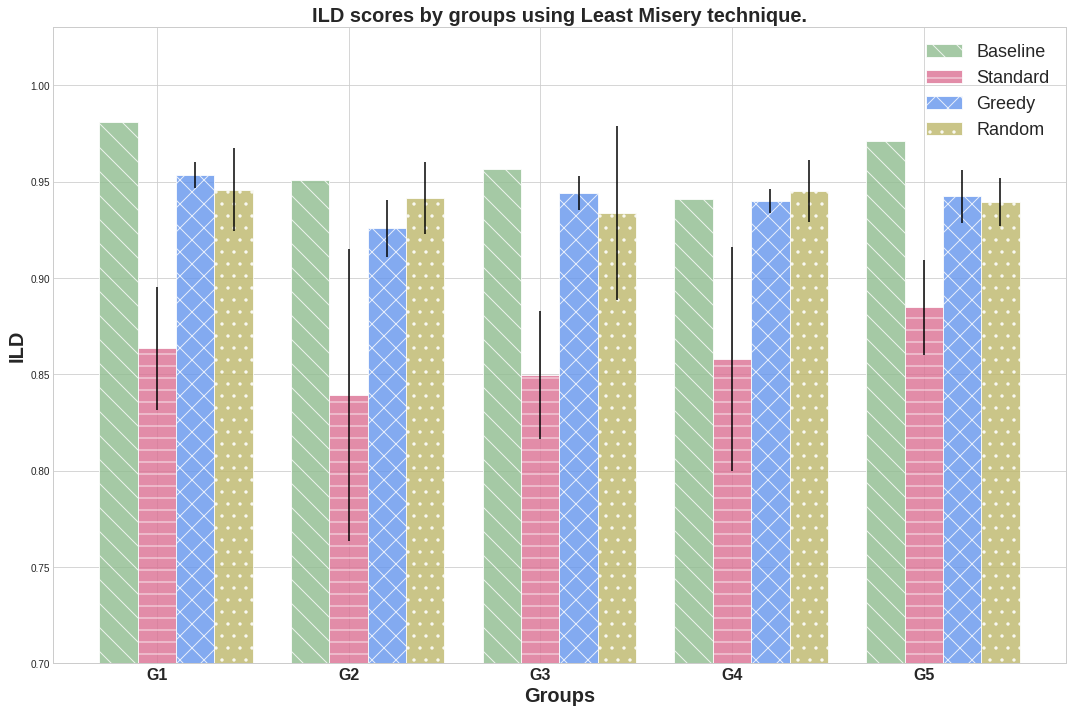

In [56]:
plt.rcParams['figure.figsize'] = (15,10)

# data to plot
n = 5
baseline_ild = baseline_lm_ild
m_standard = m_lm_standard
m_greedy = m_lm_greedy
m_random = m_lm_random
std_standard = std_lm_standard
std_greedy = std_lm_greedy
std_random = std_lm_random

# create plot
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.2
opacity = 0.8

line1 = plt.bar(index, baseline_ild, bar_width, alpha=opacity, color='darkseagreen', label='Baseline', hatch="\\", edgecolor='white')
line2 = plt.bar(index + bar_width, m_standard, bar_width, alpha=opacity, color='palevioletred', yerr=std_standard,  label='Standard', hatch="-", edgecolor='white')
line3 = plt.bar(index + bar_width + bar_width, m_greedy, bar_width, alpha=opacity, color='cornflowerblue', yerr=std_greedy, label='Greedy', hatch="x", edgecolor='white')
line4 = plt.bar(index + bar_width + bar_width + bar_width, m_random, bar_width, alpha=opacity, color='darkkhaki', yerr=std_random, label='Random', hatch=".", edgecolor='white')


plt.xlabel('Groups', fontweight="bold", fontsize=20)
plt.ylabel('ILD', fontweight="bold", fontsize=20)
plt.title('ILD scores by groups using Least Misery technique.', fontweight="bold", fontsize=20)
plt.xticks(index + bar_width, ('G1', 'G2', 'G3', 'G4', 'G5'), fontweight="bold", fontsize="16")

plt.legend(fontsize=18)

axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_ylim([0.7,None])

plt.savefig('ild_scores_by_groups_enhanced_LM.png', transparent=True)
plt.tight_layout()
plt.show()

In [57]:
baseline_lm_p10 = read_as_json('baseline_lm_p10.json')
print(baseline_lm_p10)

[0.8, 0.7, 0.6, 0.3, 0.6]


In [58]:
p10_lm = get_means_std_dict(prop_p10_lm)

print(p10_lm)

[{'m_standard': 0.36, 'm_greedy': 0.3, 'm_random': 0.38, 'std_standard': 0.1673, 'std_greedy': 0.1, 'std_random': 0.1483}, {'m_standard': 0.4, 'm_greedy': 0.46, 'm_random': 0.42, 'std_standard': 0.0, 'std_greedy': 0.0894, 'std_random': 0.0837}, {'m_standard': 0.16, 'm_greedy': 0.26, 'm_random': 0.32, 'std_standard': 0.114, 'std_greedy': 0.0894, 'std_random': 0.1304}, {'m_standard': 0.5, 'm_greedy': 0.46, 'm_random': 0.34, 'std_standard': 0.2, 'std_greedy': 0.1517, 'std_random': 0.0548}, {'m_standard': 0.42, 'm_greedy': 0.5, 'm_random': 0.48, 'std_standard': 0.0837, 'std_greedy': 0.0707, 'std_random': 0.2168}]


In [59]:
m_lm_p10_standard = []
m_lm_p10_greedy = []
m_lm_p10_random = []
std_lm_p10_standard = []
std_lm_p10_greedy = []
std_lm_p10_random = []
for group in p10_lm:
    m_lm_p10_standard.append(group['m_standard'])
    m_lm_p10_greedy.append(group['m_greedy'])
    m_lm_p10_random.append(group['m_random'])
    std_lm_p10_standard.append(group['std_standard'])
    std_lm_p10_greedy.append(group['std_greedy'])
    std_lm_p10_random.append(group['std_random'])
    
print(m_lm_p10_standard, m_lm_p10_greedy, m_lm_p10_random)

[0.36, 0.4, 0.16, 0.5, 0.42] [0.3, 0.46, 0.26, 0.46, 0.5] [0.38, 0.42, 0.32, 0.34, 0.48]


[0.36, 0.4, 0.16, 0.5, 0.42] [0.3, 0.46, 0.26, 0.46, 0.5] [0.38, 0.42, 0.32, 0.34, 0.48]


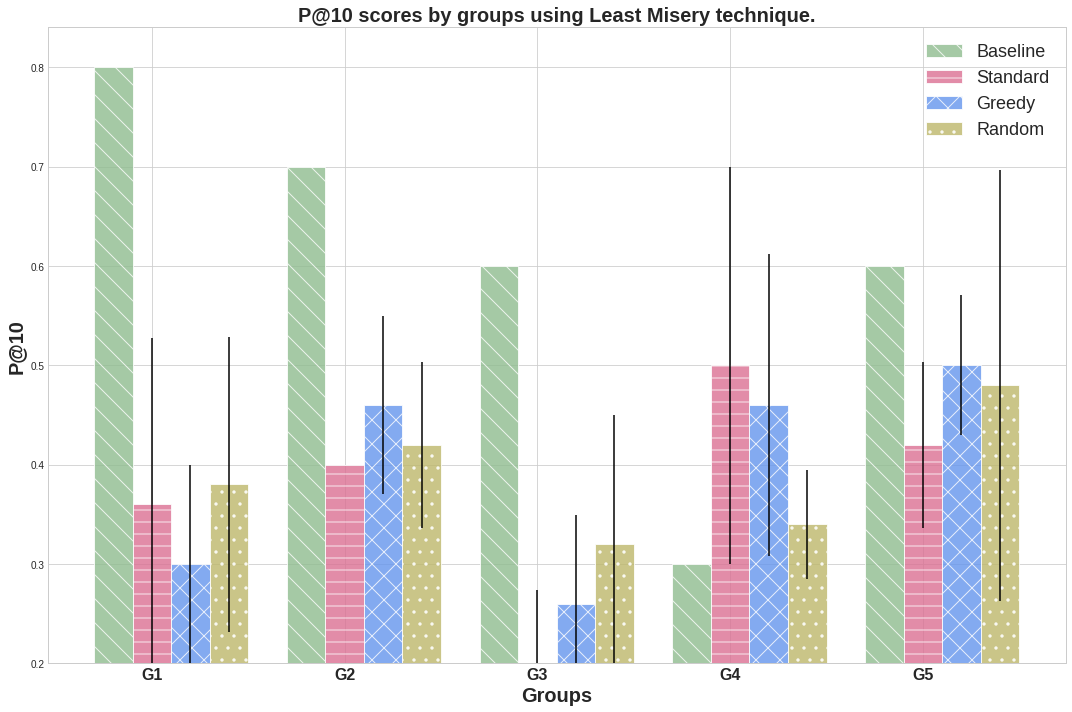

In [60]:
plt.rcParams['figure.figsize'] = (15,10)

# data to plot
n = 5
baseline_p10 = baseline_lm_p10
m_standard = m_lm_p10_standard
m_greedy = m_lm_p10_greedy
m_random = m_lm_p10_random
std_standard = std_lm_p10_standard
std_greedy = std_lm_p10_greedy
std_random = std_lm_p10_random

print(m_standard, m_greedy, m_random)

# create plot
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.2
opacity = 0.8

line1 = plt.bar(index, baseline_p10, bar_width, alpha=opacity, color='darkseagreen', label='Baseline', hatch="\\", edgecolor='white')
line2 = plt.bar(index + bar_width, m_standard, bar_width, alpha=opacity, color='palevioletred', yerr=std_standard,  label='Standard', hatch="-", edgecolor='white')
line3 = plt.bar(index + bar_width + bar_width, m_greedy, bar_width, alpha=opacity, color='cornflowerblue', yerr=std_greedy, label='Greedy', hatch="x", edgecolor='white')
line4 = plt.bar(index + bar_width + bar_width + bar_width, m_random, bar_width, alpha=opacity, color='darkkhaki', yerr=std_random, label='Random', hatch=".", edgecolor='white')


plt.xlabel('Groups', fontweight="bold", fontsize=20)
plt.ylabel('P@10', fontweight="bold", fontsize=20)
plt.title('P@10 scores by groups using Least Misery technique.', fontweight="bold", fontsize=20)
plt.xticks(index + bar_width, ('G1', 'G2', 'G3', 'G4', 'G5'), fontweight="bold", fontsize="16")

plt.legend(fontsize=18)

axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_ylim([0.2,None])

plt.savefig('p@10_scores_by_groups_LM.png', transparent=True)
plt.tight_layout()
plt.show()